In [1]:
from glob import glob
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
root = "REPORT HL/*"
report = pd.DataFrame({})
report["CTT"] = []


In [3]:
count = 0

list_throughput = []
list_response_time = []
list_data = []

report = pd.DataFrame(columns=["CTT", "Throughput", "Response Time"])

for val in sorted(glob(root)):
    data = pd.read_csv(val)

    duration = (data["timeStamp"].max() - data["timeStamp"].min())/1000 
    throughput = data[data["responseMessage"] == "OK"].shape[0]/(duration)
    response_time = data["elapsed"].mean()/1000

    list_throughput.append(throughput)
    list_response_time.append(response_time)

    count += 1

    if count == 3: 
        mean_throughput = sum(list_throughput) / len(list_throughput)
        mean_response_time = sum(list_response_time) / len(list_response_time)

        number = re.findall(r'\d+', val)

        new_row = pd.DataFrame({
            "CTT": [number[0]],
            "Throughput": [mean_throughput],
            "Response Time": [mean_response_time]
        })

        report = pd.concat([report, new_row], ignore_index=True)

        list_throughput = []
        list_response_time = []
        count = 0

report["CTT"] = report["CTT"].astype(int)
report = report.sort_values("CTT")
report["Power"] = report["Throughput"] / report["Response Time"]

max_throughput_idx = report["Throughput"].idxmax()
usable_capacity_ctt = report.loc[max_throughput_idx, "CTT"]

max_power_idx = report["Power"].idxmax()
knee_capacity_ctt = report.loc[max_power_idx, "CTT"]

usable_capacity_throughput = report.loc[report['CTT'] == usable_capacity_ctt, 'Throughput'].values[0]
knee_capacity_throughput = report.loc[report['CTT'] == knee_capacity_ctt, 'Throughput'].values[0]
usable_capacity_response_time = report.loc[report['CTT'] == usable_capacity_ctt, 'Response Time'].values[0]
knee_capacity_response_time = report.loc[report['CTT'] == knee_capacity_ctt, 'Response Time'].values[0]
usable_capacity_power = report.loc[report['CTT'] == usable_capacity_ctt, 'Power'].values[0]
knee_capacity_power = report.loc[report['CTT'] == knee_capacity_ctt, 'Power'].values[0]
# threshold = None
# for i in range(1, len(report)):
#    if report.iloc[i]["Response Time"] > 2 * report.iloc[i - 1]["Response Time"]:
#        threshold = report.iloc[i]["CTT"]
#        break

#response_time_limit = 220  

#report_m = report[report["Throughput"] < 200]

#max_throughput = report_m[report_m["Response Time"] <= response_time_limit]["Throughput"].max()
#max_throughput_ctt = report_m[report_m["Throughput"] == max_throughput]["CTT"].values[0]

print(f"The Usable capacity as CTT value is: {usable_capacity_ctt}")
print(f"The Knee Capacity as CTT value is: {knee_capacity_ctt}")
report

/var/folders/vz/q_cb6xsj5jvbk35z8t6bxpyc0000gn/T/ipykernel_7974/3526648181.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  report = pd.concat([report, new_row], ignore_index=True)


The Usable capacity as CTT value is: 12500
The Knee Capacity as CTT value is: 10000


,CTT,Throughput,Response Time,Power
2,1500,25.166002,0.018826,1336.789757
4,3250,54.320532,0.012117,4483.028212
5,6750,112.415795,0.010581,10624.630638
0,10000,166.617223,0.007546,22080.011288
1,12500,203.450589,0.046367,4387.864185
3,25000,197.198471,0.216604,910.409571


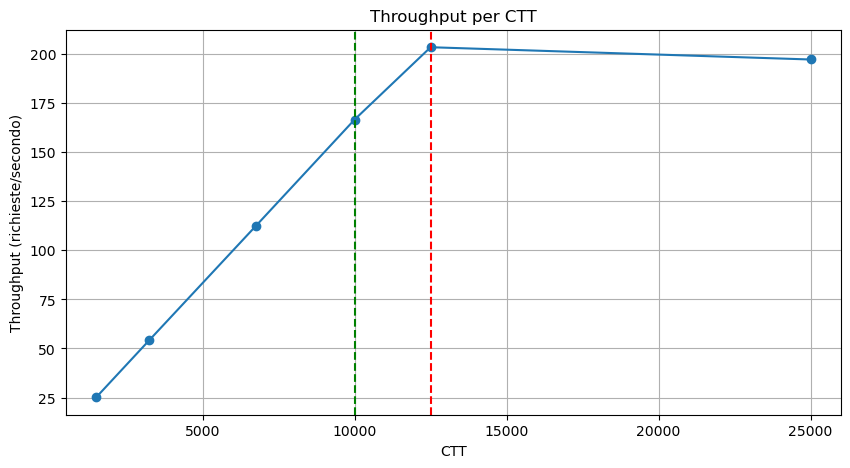

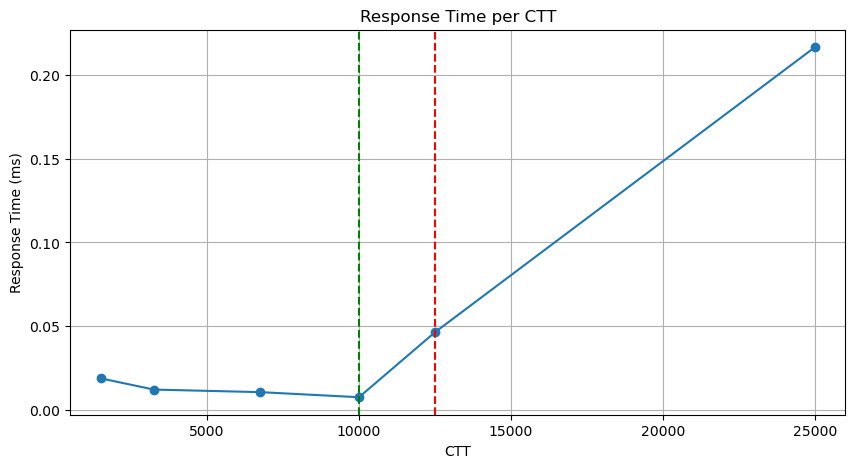

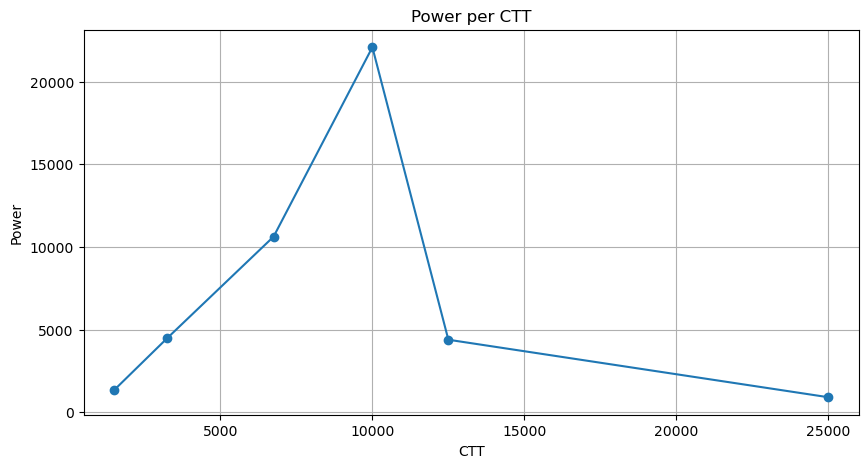

In [4]:
plt.figure(figsize=(10, 5))
#sns.lineplot(x="CTT", y="Throughput", data=report, marker="o")
#plt.xticks([_ for _ in range(0,25000,2500)])
#plt.xticks(fontsize=8) 
plt.plot(report['CTT'], report['Throughput'], marker="o") 
plt.axvline(x = usable_capacity_ctt, color='r', linestyle='--', label="Usable Capacity")
plt.axvline(x = knee_capacity_ctt, color='g', linestyle='--', label="Knee Capacity")
plt.title("Throughput per CTT")
plt.xlabel("CTT")
plt.ylabel("Throughput (richieste/secondo)")
plt.xlim(report['CTT'].min() - 1000, report['CTT'].max() + 1000)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
#sns.lineplot(x="CTT", y="Response Time", data=report, marker="o")
#plt.xticks([_ for _ in range(0,25000,2500)])
plt.plot(report['CTT'], report['Response Time'], marker="o") 
plt.axvline(x = usable_capacity_ctt, color='r', linestyle='--', label="Usable Capacity")
plt.axvline(x = knee_capacity_ctt, color='g', linestyle='--', label="Knee Capacity")
plt.title("Response Time per CTT")
plt.xlabel("CTT")
plt.ylabel("Response Time (ms)")
plt.xlim(report['CTT'].min() - 1000, report['CTT'].max() + 1000)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
#sns.lineplot(x="CTT", y="Power", data=report, marker="o")
#plt.xticks([_ for _ in range(0,25000,2500)])
plt.plot(report['CTT'], report['Power'], marker="o") 

plt.title("Power per CTT")
plt.xlabel("CTT")
plt.ylabel("Power")
plt.xlim(report['CTT'].min() - 1000, report['CTT'].max() + 1000)
plt.grid(True)
plt.show()

In [5]:
root = "REPORT LL/*"

list_mean = []
count = 0
report_ll = pd.DataFrame({})

for val in sorted(glob(root)):
    data = pd.read_csv(val, delim_whitespace=True, skiprows=1)
    mean_values = data.mean()

    list_mean.append(mean_values)

    count += 1

    if count == 3:
        ser = pd.Series(list_mean[0])
        
        for rec in list_mean[1:]:
            ser = ser.add(rec)

        ser = ser / 3

        number = re.findall(r'\d+', val)

        df_ll = pd.DataFrame([ser])
        df_ll["CTT"] = number[0]

        report_ll = pd.concat([report_ll, df_ll], ignore_index=True)

        list_mean = []
        count = 0

report_ll["CTT"] = report_ll["CTT"].astype(int)
report_ll = report_ll.sort_values("CTT")
report_ll

,r,b,swpd,free,buff,cache,si,so,bi,bo,in,cs,us,sy,id,wa,st,CTT
3,1.082500,0.000833,563406.186667,139611.663333,16306.653333,319625.366667,4.630833,0.100000,11.120000,18.063333,2921.371667,2254.409167,12.740000,10.415000,76.717500,0.037500,0.0,1500
5,0.942500,0.000833,551366.826667,158212.476667,14168.656667,297838.073333,4.113333,0.123333,18.394167,18.668333,4654.806667,2371.651667,12.721667,17.298333,69.830000,0.024167,0.0,3250
6,1.269167,0.001667,657509.546667,149153.726667,5858.423333,228337.483333,188.064167,64.441667,214.300833,84.256667,6696.430000,2498.008333,11.125000,24.739167,63.850833,0.199167,0.0,6750
0,1.288333,0.004167,576247.680000,101514.643333,8852.193333,312194.080000,0.833333,0.151667,13.582500,25.908333,8345.741667,2397.210000,11.620833,32.403333,55.799167,0.015000,0.0,10000
1,3.542500,0.000833,630618.026667,79383.523333,4708.986667,241833.823333,1.026667,7.635000,31.715833,36.137500,10060.857500,2585.996667,13.925833,50.611667,35.397500,0.011667,0.0,12500
2,8.874167,0.010000,565776.000000,108967.133333,14455.240000,297822.386667,0.244167,0.110833,3.402500,31.180833,9620.719167,2625.190000,16.315000,62.512500,21.163333,0.002500,0.0,15000
4,10.642500,0.000000,516070.826667,68168.423333,6812.133333,253540.293333,1.341667,16.372500,34.343333,47.023333,9968.106667,2568.619167,14.640833,64.359167,20.996667,0.005833,0.0,25000


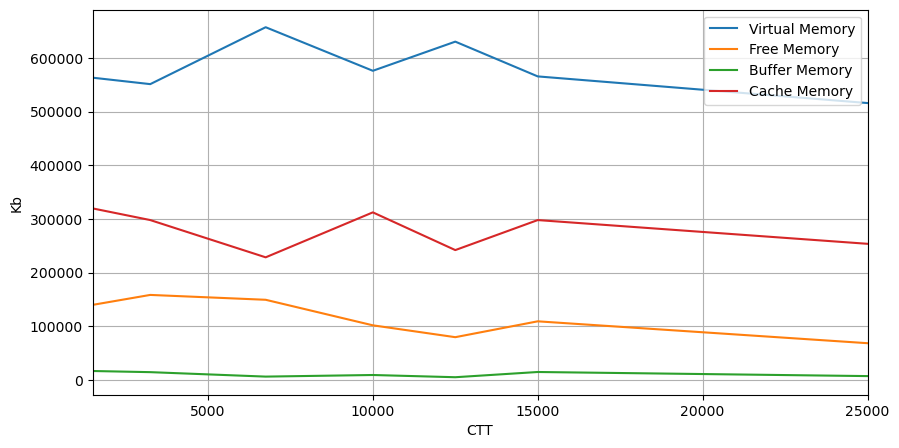

In [6]:
plt.figure(figsize=(10, 5))
# sns.lineplot(data=report_ll[['swpd', 'free', 'buff', 'cache']])
# plt.xticks(range(len(report_ll)), report_ll['CTT'])
plt.plot(report_ll['CTT'], report_ll['swpd'], label='Virtual Memory')
plt.plot(report_ll['CTT'], report_ll['free'], label='Free Memory')
plt.plot(report_ll['CTT'], report_ll['buff'], label='Buffer Memory')
plt.plot(report_ll['CTT'], report_ll['cache'], label='Cache Memory')

plt.xlim(report_ll['CTT'].min(), report_ll['CTT'].max())
plt.xlabel("CTT")
plt.ylabel("Kb")
# plt.legend(['swpd', 'free', 'buff', 'cache'])
plt.legend()
plt.grid(True)
plt.show()

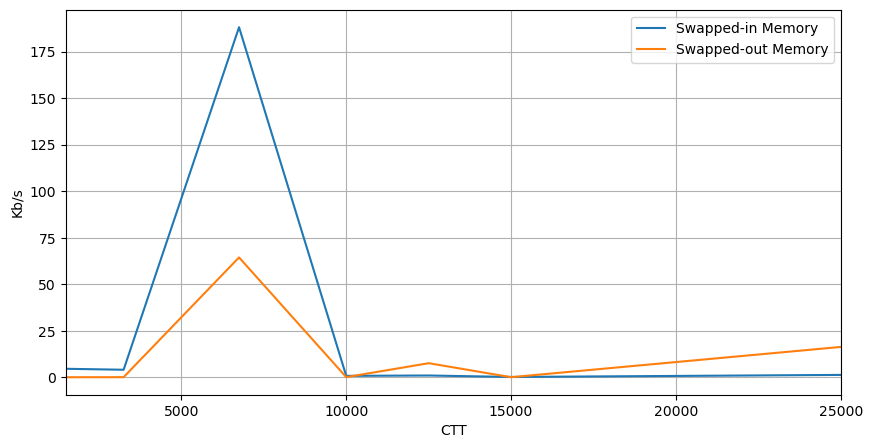

In [7]:
plt.figure(figsize=(10, 5))
#sns.lineplot(data=report_ll[['si', 'so']])
#plt.xticks(range(len(report_ll)), report_ll['CTT'])
plt.plot(report_ll['CTT'], report_ll['si'], label='Swapped-in Memory')
plt.plot(report_ll['CTT'], report_ll['so'], label='Swapped-out Memory')

plt.xlim(report_ll['CTT'].min(), report_ll['CTT'].max())

plt.xlabel("CTT")
plt.ylabel("Kb/s")
plt.legend()
plt.grid(True)
plt.show()

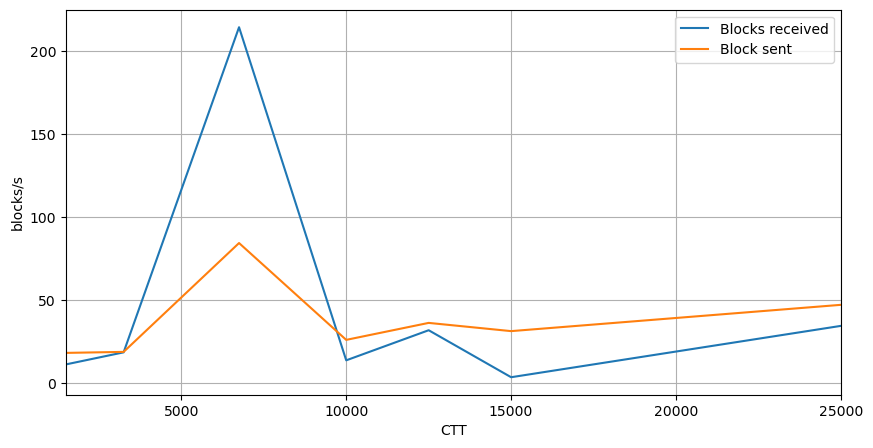

In [8]:
plt.figure(figsize=(10, 5))
#sns.lineplot(data=report_ll[['bi', 'bo']])
#plt.xticks(range(len(report_ll)), report_ll['CTT'])
plt.plot(report_ll['CTT'], report_ll['bi'], label='Blocks received')
plt.plot(report_ll['CTT'], report_ll['bo'], label='Block sent')

plt.xlim(report_ll['CTT'].min(), report_ll['CTT'].max())

plt.xlabel("CTT")
plt.ylabel("blocks/s")
plt.legend()
plt.grid(True)
plt.show()

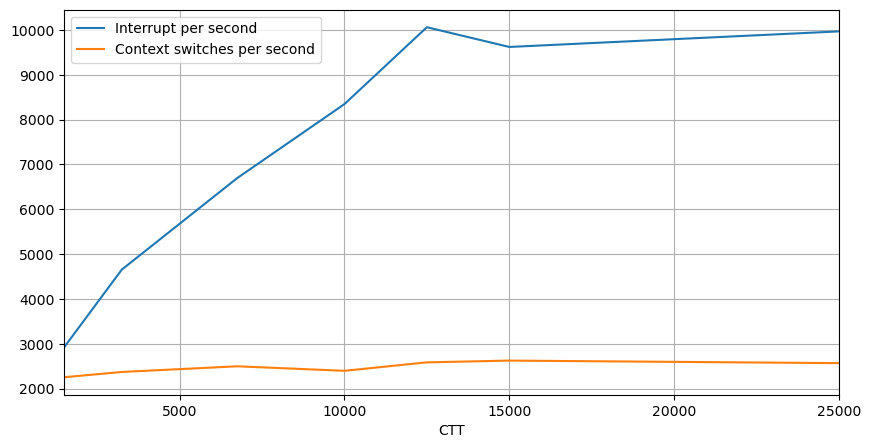

In [9]:
plt.figure(figsize=(10, 5))
#sns.lineplot(data=report_ll[['in', 'cs']])
#plt.xticks(range(len(report_ll)), report_ll['CTT'])
plt.plot(report_ll['CTT'], report_ll['in'], label='Interrupt per second')
plt.plot(report_ll['CTT'], report_ll['cs'], label='Context switches per second')

plt.xlim(report_ll['CTT'].min(), report_ll['CTT'].max())

plt.xlabel("CTT")
#plt.legend(['Interrupt per second', 'Context switches per second'])
plt.legend()
plt.grid(True)
plt.show()

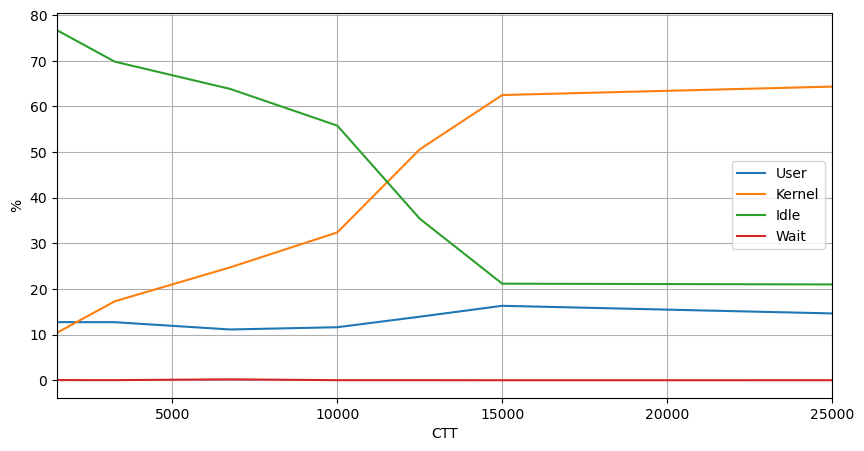

In [10]:

plt.figure(figsize=(10, 5))
#sns.lineplot(data=report_ll[['us', 'sy', 'id', 'wa']])
#plt.xticks(range(len(report_ll)), report_ll['CTT'])
plt.plot(report_ll['CTT'], report_ll['us'], label='User')
plt.plot(report_ll['CTT'], report_ll['sy'], label='Kernel')
plt.plot(report_ll['CTT'], report_ll['id'], label='Idle')
plt.plot(report_ll['CTT'], report_ll['wa'], label='Wait')

plt.xlim(report_ll['CTT'].min(), report_ll['CTT'].max())

plt.xlabel("CTT")
plt.ylabel("%")

plt.legend()
plt.grid(True)
plt.show()


In [11]:
root = "REPORT FAIRNESS INDEX/*"
report_fi = pd.DataFrame({})
report_fi["CTT"] = []

In [12]:
# Calcolo fairness index
nominal_throughputs = [11000, 8000, 5000, 5000, 8000, 11000, 5000, 8000, 11000]
nominal_throughputs = [x / 60 for x in nominal_throughputs]

measured_throughputs = []

for val in sorted(glob(root)):
    data = pd.read_csv(val)
    
    duration = (data["timeStamp"].max() - data["timeStamp"].min())/1000 
    throughput = data[data["responseMessage"] == "OK"].shape[0]/(duration)

    measured_throughputs.append(throughput)

normalized_throughputs = [m / n for m, n in zip(measured_throughputs, nominal_throughputs)]

sums = [sum(normalized_throughputs[i:i+3]) for i in range(0, len(normalized_throughputs), 3)]
square_of_sums = np.power(sums, 2)

squares = np.power(normalized_throughputs,2)
sum_of_squares = [sum(squares[i:i+3]) for i in range(0, len(squares), 3)]

fairness_indexes = [(m)/(3*n) for m, n in zip(square_of_sums, sum_of_squares)]

print("FAIRNESS INDEX FAIR:", fairness_indexes[0])
print("FAIRNESS INDEX UNFAIR:", fairness_indexes[2])
print("FAIRNESS INDEX RANDOM:", fairness_indexes[1])



FAIRNESS INDEX FAIR: 0.8333388769222038
FAIRNESS INDEX UNFAIR: 0.732656958759833
FAIRNESS INDEX RANDOM: 0.7813459487235578
